<a href="https://colab.research.google.com/github/Jushef/Proyectos-ML-DL/blob/main/Aprendizaje%20Supervisado/Regression_Master.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Regression-Master**
Modelización predictiva basada en la regresión y las series temporales.

##**Contenido**

* [1. Problem Statement](#0)
* [2. Getting Started - Load Libraries and Dataset](#1)
    * [2.1. Load Libraries](#1.1)    
    * [2.2. Load Dataset](#1.2)
* [3. Exploratory Data Analysis](#2)
    * [3.1 Descriptive Statistics](#2.1)    
    * [3.2. Data Visualisation](#2.2)
* [4. Data Preparation](#3)
    * [4.1 Data Cleaning](#3.1)
    * [4.3.Feature Selection](#3.2)
    * [4.3.Data Transformation](#3.3) 
        * [4.3.1 Rescaling ](#3.3.1)
        * [4.3.2 Standardization](#3.3.2)
        * [4.3.3 Normalization](#3.3.3)    
* [5.Evaluate Algorithms and Models](#4)        
    * [5.1. Train/Test Split](#4.1)
    * [5.2. Test Options and Evaluation Metrics](#4.2)
    * [5.3. Compare Models and Algorithms](#4.3)
        * [5.3.1 Common Regression Models](#4.3.1)
        * [5.3.2 Ensemble Models](#4.3.2)
        * [5.3.3 Deep Learning Models](#4.3.3)  
    * [5.4. Time Series based Models-ARIMA and LSTM](#4.4)
        * [5.4.1 ARIMA Model](#4.4.1)
        * [5.4.2 LSTM Model](#4.4.2) 
* [6. Model Tuning and Grid Search](#5)
    * [6.1 Common Regression, Ensemble and DeepNNRegressor Grid Search](#5.1)
    * [6.2 ARIMA and LSTM Grid Search](#5.2) 
* [7. Finalize the Model](#6)  
    * [7.1. Results on test dataset](#6.1)
    * [7.1. Variable Intuition/Feature Selection](#6.2) 
    * [7.3. Save model for later use](#6.3)

<a id='0'></a>
# 1. Problem Statement

Nuestro objetivo en este cuaderno jupyter es bajo lo siguiente. Un problema de predicción del precio de las acciones presentado en este caso de estudio.

* Cómo trabajar a través de un problema de modelado predictivo de principio a fin. Este cuaderno es aplicable tanto a problemas de regresión como de clasificación.

* Cómo utilizar las transformaciones de datos para mejorar el rendimiento del modelo.

* Cómo utilizar el ajuste del algoritmo para mejorar el rendimiento del modelo.

* Cómo utilizar los métodos de conjunto y el ajuste de los métodos de conjunto para mejorar el rendimiento del modelo.

* Cómo utilizar los métodos de aprendizaje profundo.

* Se implementan los siguientes modelos:
  * Linear Regression
  * Lasso
  * Elastic Net
  * KNN
  * Decision Tree (CART)
  * Support Vector Machine
  * Ada Boost
  * Gradient Boosting Method
  * Random Forest
  * Extra Trees
  * Neural Network - Shallow - Using sklearn
  * Deep Neural Network - Using Keras
  * Time Series Models

    * ARIMA Model
    * LSTM - Using Keras


<a id='1'></a>
# 2. Getting Started- Loading the data and python packages

<a id='1.1'></a>
## 2.1. Loading the python packages

In [1]:
!pip install yfinance

     |████████████████████████████████| 6.4 MB 6.6 MB/s 
     |████████████████████████████████| 62 kB 544 kB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.26.0 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [3]:
# Load libraries
import numpy as np
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yf
import datetime
from matplotlib import pyplot
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neural_network import MLPRegressor

#Libraries for Deep Learning Models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import LSTM
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

#Libraries for Statistical Models
import statsmodels.api as sm

#Libraries for Saving the Model
from pickle import dump
from pickle import load

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<a id='1.2'></a>
## 2.2. Loading the Data

In [4]:
start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2021,12,27)

In [5]:
# Obtenemos los datos mediante webscapping utilizando pandas datareader
return_period = 21


stk_tickers = ['MSFT', 'IBM', 'GOOGL']
ccy_tickers = ['DEXJPUS', 'DEXUSUK']
idx_tickers = ['SP500', 'DJIA', 'VIXCLS']

yf.pdr_override()

stk_data = pdr.get_data_yahoo(stk_tickers, start= start, end= end)
ccy_data = pdr.get_data_fred(ccy_tickers, start= start, end= end)
idx_data = pdr.get_data_fred(idx_tickers, start= start, end= end)

Y = np.log(stk_data.loc[:, ('Adj Close', 'MSFT')]).diff(return_period).shift(-return_period)
Y.name = Y.name[-1]+'_pred'

X1 = np.log(stk_data.loc[:, ('Adj Close', ('GOOGL', 'IBM'))]).diff(return_period)
X1.columns = X1.columns.droplevel()
X2 = np.log(ccy_data).diff(return_period)
X3 = np.log(idx_data).diff(return_period)

X4 = pd.concat([Y.diff(i) for i in [21, 63, 126,252]], axis=1).dropna()
X4.columns = ['1M', '3M', '6M', '1Y']

X = pd.concat([X1, X2, X3, X4], axis=1)

dataset = pd.concat([Y, X], axis=1).dropna()
Y = dataset.loc[:, Y.name]
X = dataset.loc[:, X.columns]

[*********************100%***********************]  3 of 3 completed


In [6]:
#Ignorar las advertencias
import warnings
warnings.filterwarnings('ignore')

In [7]:
type(dataset)

pandas.core.frame.DataFrame

**Conversión de los datos en formato de regresión supervisada.**

Todas las variables predictoras se convierten en variables retardadas, ya que el valor t-1 de la variable retardada se utilizará para la predicción.

In [8]:
def series_to_supervised(data, lag=1):
    n_vars = data.shape[1]
    df = pd.DataFrame(data)    
    cols, names = list(), list()
    for i in range(lag, 0, -1):
        cols.append(df.shift(i))
        names += [('%s(t-%d)' % (df.columns[j], i)) for j in range(n_vars)]
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    agg = pd.DataFrame(data.iloc[:,0]).join(agg)
    agg.dropna(inplace=True)
    return agg

In [9]:
dataset= series_to_supervised(dataset,1)

<a id='2'></a>
# 3. Exploratory Data Analysis

<a id='2.1'></a>
## 3.1. Descriptive Statistics

In [10]:
# shape
dataset.shape

(2331, 13)

In [11]:
# consultar los datos
pd.set_option('display.width', 100)
dataset.head(2)

,MSFT_pred,MSFT_pred(t-1),GOOGL(t-1),IBM(t-1),DEXJPUS(t-1),DEXUSUK(t-1),SP500(t-1),DJIA(t-1),VIXCLS(t-1),1M(t-1),3M(t-1),6M(t-1),1Y(t-1)
2012-02-01,0.077271,0.076027,-0.101962,0.045215,-0.009135,0.009799,0.043117,0.035077,-0.187463,-0.060936,0.159916,0.128355,0.129138
2012-02-02,0.066499,0.077271,-0.106187,0.046436,-0.007331,0.012316,0.036165,0.025412,-0.213719,-0.063697,0.109996,0.078470,0.137465


In [14]:
dataset.tail(2)

,MSFT_pred,MSFT_pred(t-1),GOOGL(t-1),IBM(t-1),DEXJPUS(t-1),DEXUSUK(t-1),SP500(t-1),DJIA(t-1),VIXCLS(t-1),1M(t-1),3M(t-1),6M(t-1),1Y(t-1)
2021-11-22,-0.019703,-0.047204,0.048429,-0.042355,0.000527,-0.024776,0.032049,-0.000031,0.176643,-0.148062,-0.027079,-0.103376,-0.093970
2021-11-23,-0.008894,-0.019703,0.061566,-0.035229,0.010078,-0.024234,0.029920,-0.001621,0.217033,-0.116117,-0.009539,-0.077472,-0.082118


In [12]:
# types
pd.set_option('display.max_rows', 500)
dataset.dtypes

MSFT_pred         float64
MSFT_pred(t-1)    float64
GOOGL(t-1)        float64
IBM(t-1)          float64
DEXJPUS(t-1)      float64
DEXUSUK(t-1)      float64
SP500(t-1)        float64
DJIA(t-1)         float64
VIXCLS(t-1)       float64
1M(t-1)           float64
3M(t-1)           float64
6M(t-1)           float64
1Y(t-1)           float64
dtype: object

In [15]:
# describir los datos
pd.set_option('precision', 3)
dataset.describe()

,MSFT_pred,MSFT_pred(t-1),GOOGL(t-1),IBM(t-1),DEXJPUS(t-1),DEXUSUK(t-1),SP500(t-1),DJIA(t-1),VIXCLS(t-1),1M(t-1),3M(t-1),6M(t-1),1Y(t-1)
count,2331.000,2331.000,2331.000,2.331e+03,2331.000,2.331e+03,2331.000,2331.000,2331.000,2.331e+03,2.331e+03,2.331e+03,2331.000
mean,0.022,0.022,0.019,-3.840e-04,0.003,-1.176e-03,0.010,0.009,-0.002,-9.155e-04,-1.260e-03,6.520e-04,0.002
std,0.057,0.057,0.065,6.348e-02,0.024,2.340e-02,0.041,0.043,0.257,8.738e-02,8.623e-02,7.975e-02,0.081
min,-0.302,-0.302,-0.351,-4.608e-01,-0.083,-1.227e-01,-0.400,-0.444,-0.827,-4.272e-01,-3.467e-01,-3.269e-01,-0.410
25%,-0.010,-0.010,-0.020,-3.268e-02,-0.011,-1.511e-02,-0.005,-0.007,-0.148,-5.457e-02,-4.899e-02,-5.019e-02,-0.048
50%,0.025,0.025,0.021,2.927e-03,0.002,1.886e-04,0.015,0.013,-0.023,-4.821e-04,-7.553e-04,-2.792e-03,0.002
75%,0.054,0.054,0.057,3.786e-02,0.015,1.451e-02,0.032,0.031,0.116,4.925e-02,5.046e-02,4.846e-02,0.052
max,0.244,0.244,0.247,2.303e-01,0.102,6.963e-02,0.203,0.214,1.799,5.407e-01,3.619e-01,2.918e-01,0.286


<a id='2.2'></a>
## 3.2. Data Visualization

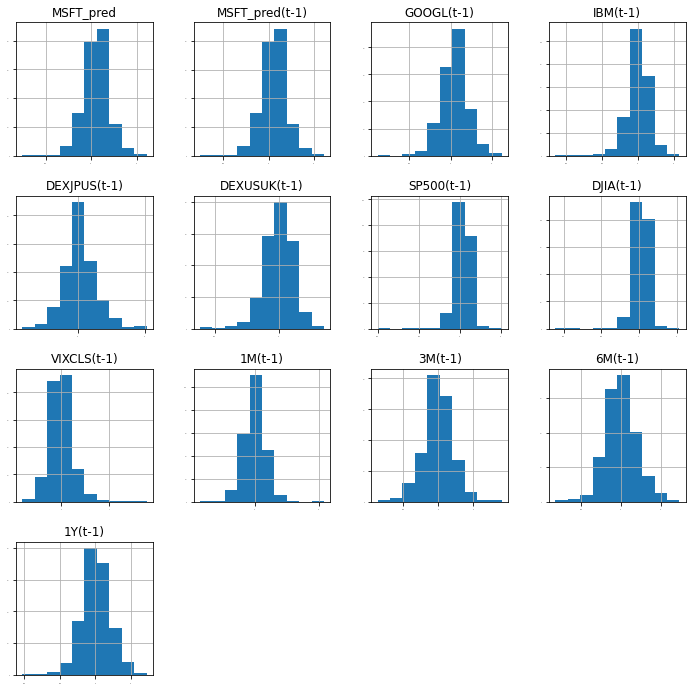

In [16]:
# histograms
dataset.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize=(12,12))
pyplot.show()

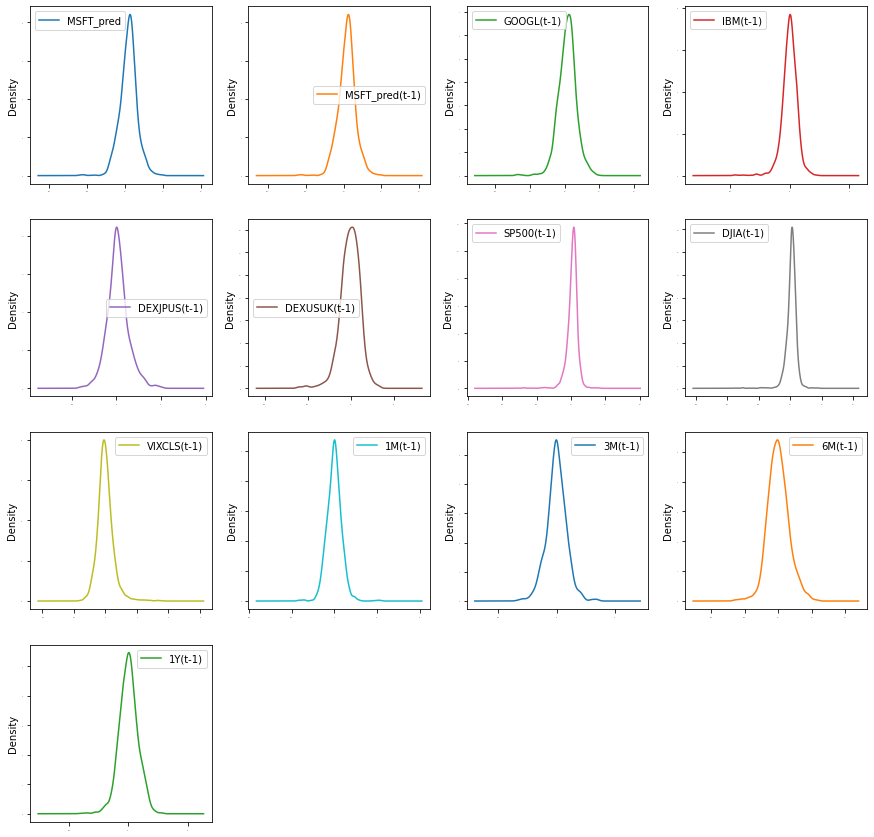

In [17]:
# density
dataset.plot(kind='density', subplots=True, layout=(4,4), sharex=False, legend=True, fontsize=1, figsize=(15,15))
pyplot.show()

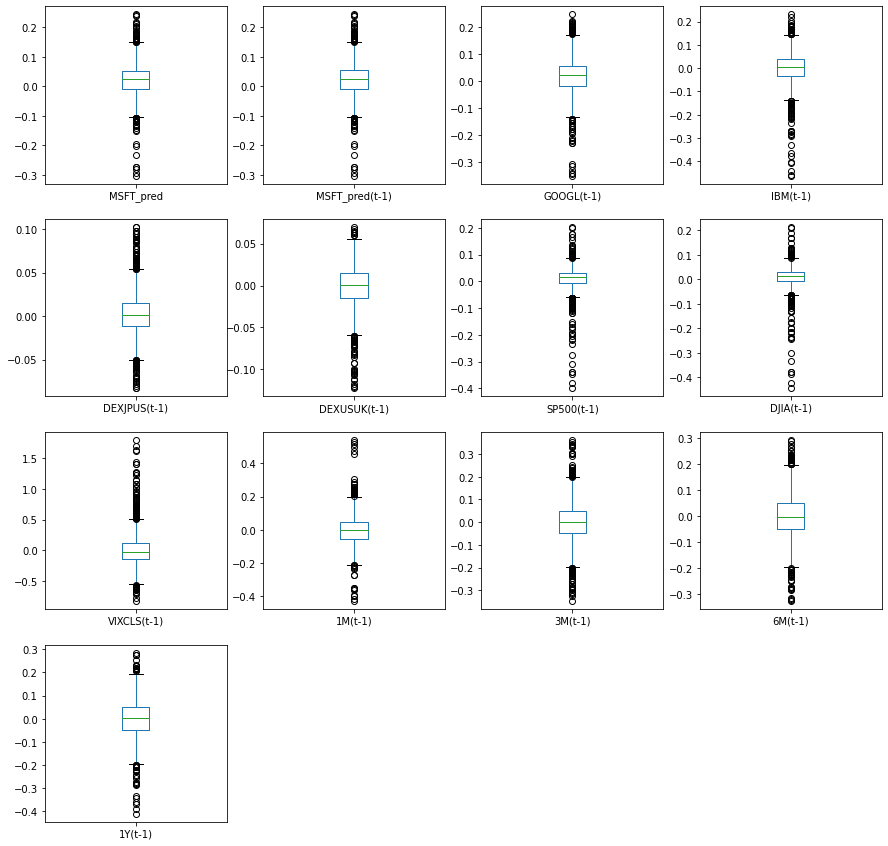

In [18]:
#Box and Whisker Plots
dataset.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(15,15))
pyplot.show()

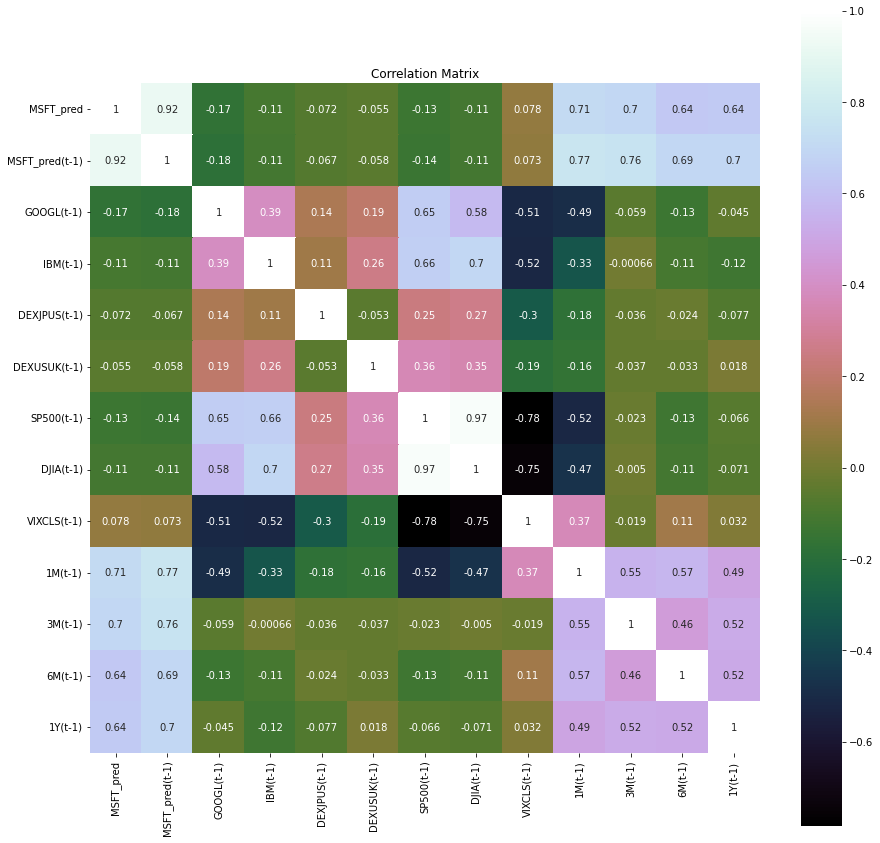

In [19]:
# correlation
correlation = dataset.corr()
pyplot.figure(figsize=(15,15))
pyplot.title('Correlation Matrix')
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

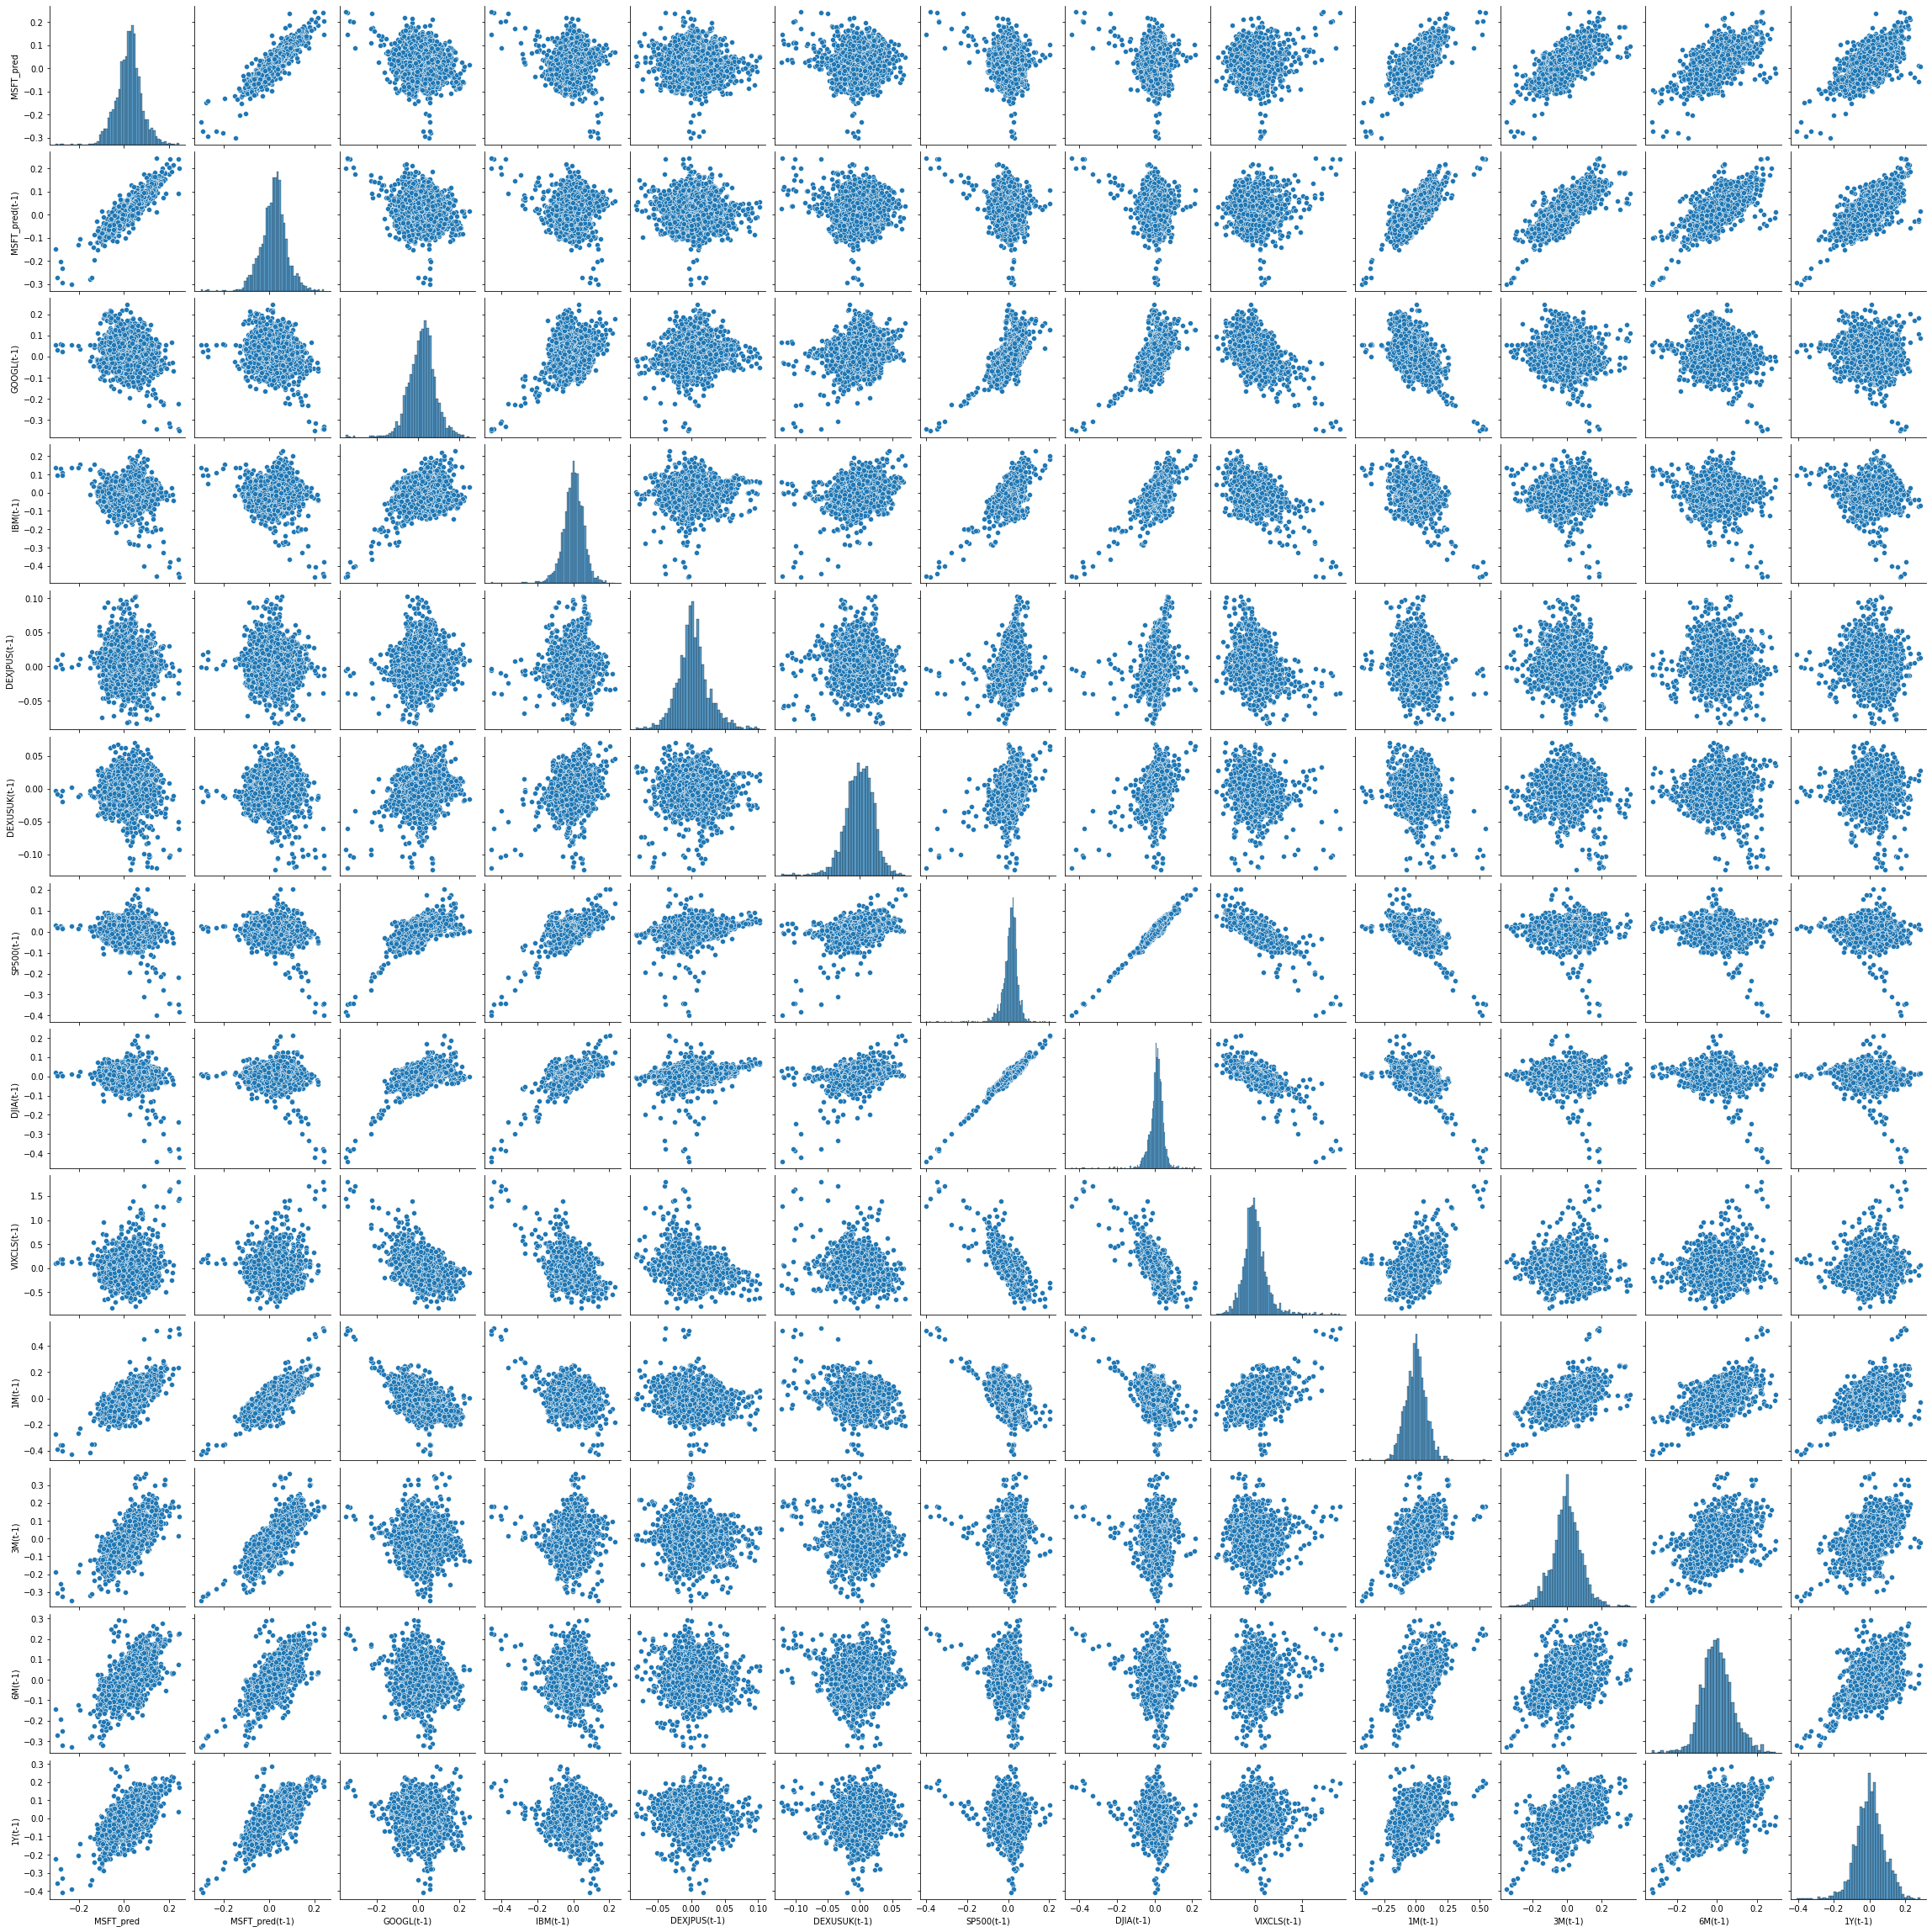

In [20]:
sns.pairplot(dataset)

<a id='2.3'></a>
## 3.3. Time Series Analysis

Series temporales desglosadas en diferentes componentes de series temporales

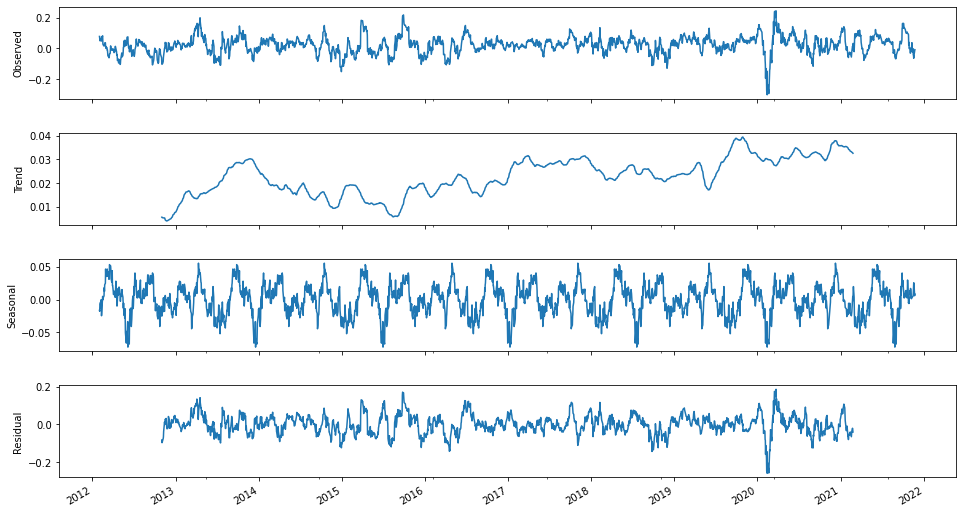

In [21]:
Y= dataset["MSFT_pred"]
res = sm.tsa.seasonal_decompose(Y,freq=365)
fig = res.plot()
fig.set_figheight(8)
fig.set_figwidth(15)
pyplot.show()

<a id='3'></a>
## 4. Data Preparation

<a id='3.1'></a>
## 4.1. Data Cleaning
Comprobar los NA en las filas, elimínalos o rellénalos con la media de la columna.

In [22]:
#Checking for any null values and removing the null values'''
print('Null Values =',dataset.isnull().values.any())

Null Values = False


* Dado que hay valores nulos, se elimina la raíz que contiene los valores nulos.

In [23]:
# Drop the rows containing NA
#dataset.dropna(axis=0)
# Fill na with 0
#dataset.fillna('0')

#Filling the NAs with the mean of the column.
#dataset['col'] = dataset['col'].fillna(dataset['col'].mean())

<a id='3.3'></a>
## 4.3. Feature Selection
La biblioteca scikit-learn proporciona la clase SelectKBest que puede ser utilizada con un conjunto de diferentes pruebas estadísticas para seleccionar un número específico de características. El ejemplo siguiente utiliza la prueba estadística chi-cuadrado (chi²) para características no negativas para seleccionar 10 de las mejores características del conjunto de datos.

In [24]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

bestfeatures = SelectKBest(k=5)
bestfeatures

SelectKBest(k=5)

In [25]:
Y= dataset["MSFT_pred"]
X = dataset.loc[:, dataset.columns != 'MSFT_pred']
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
# concatenar dos marcos de datos para una mejor visualización 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  # nombrar las columnas del marco de datos
print(featureScores.nlargest(10,'Score'))  # imprimir 10 mejores características

             Specs    Score
0   MSFT_pred(t-1)  636.480
1       GOOGL(t-1)   14.705
10         6M(t-1)    8.102
9          3M(t-1)    6.571
4     DEXUSUK(t-1)    3.264
8          1M(t-1)    1.656
5       SP500(t-1)    1.523
7      VIXCLS(t-1)    1.352
11         1Y(t-1)    1.177
6        DJIA(t-1)    1.064


* Como se puede ver en el resultado anterior, t-1 es una característica importante.

<a id='3.4'></a>
## 4.4. Data Transformation

<a id='3.4.1'></a>
### 4.4.1. Rescale Data
Cuando los datos se componen de atributos con escalas diferentes, muchos algoritmos de aprendizaje automático pueden beneficiarse de reescalar los atributos para que todos tengan la misma escala. A menudo esto se denomina normalización y los atributos se reescalan en un rango entre 0 y 1.

In [26]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX = pd.DataFrame(scaler.fit_transform(X))
# resumir los datos transformados
rescaledX.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.693,0.416,0.732,0.398,0.689,0.735,0.729,0.243,0.378,0.715,0.736,0.775
1,0.695,0.409,0.734,0.408,0.702,0.724,0.714,0.233,0.376,0.645,0.655,0.787
2,0.675,0.372,0.707,0.409,0.696,0.725,0.710,0.234,0.394,0.612,0.669,0.783
3,0.644,0.396,0.729,0.403,0.737,0.744,0.729,0.228,0.390,0.592,0.607,0.756
4,0.662,0.455,0.729,0.411,0.771,0.748,0.734,0.258,0.413,0.607,0.625,0.766


<a id='3.4.2'></a>
### 4.4.2. Standardize Data
La estandarización es una técnica útil para transformar los atributos con una distribución gaussiana y diferentes medias y desviaciones estándar en una distribución gaussiana estándar con una media de 0 y una desviación estándar de 1.

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
StandardisedX = pd.DataFrame(scaler.fit_transform(X))
# summarize transformed data
StandardisedX.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.954,-1.865,0.718,-0.505,0.469,0.800,0.623,-0.724,-0.687,1.870,1.602,1.573
1,0.976,-1.930,0.738,-0.431,0.577,0.630,0.396,-0.826,-0.719,1.291,0.976,1.677
2,0.786,-2.277,0.442,-0.425,0.526,0.652,0.336,-0.818,-0.513,1.020,1.082,1.640
3,0.483,-2.050,0.679,-0.472,0.868,0.935,0.629,-0.882,-0.554,0.857,0.599,1.407
4,0.662,-1.507,0.687,-0.408,1.147,0.986,0.703,-0.577,-0.306,0.986,0.742,1.496


<a id='3.4.3'></a>
### 4.4.1. Normalize Data
Normalizar en scikit-learn se refiere a reescalar cada observación (fila) para que tenga una longitud de 1 (llamada norma unitaria o un vector con la longitud de 1 en álgebra lineal).

In [28]:
from sklearn.preprocessing import Normalizer
scaler = Normalizer().fit(X)
NormalizedX = pd.DataFrame(scaler.fit_transform(X))
# summarize transformed data
NormalizedX.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.220,-0.295,0.131,-0.026,0.028,0.125,0.102,-0.543,-0.177,0.463,0.372,0.374
1,0.235,-0.322,0.141,-0.022,0.037,0.110,0.077,-0.649,-0.193,0.334,0.238,0.417
2,0.206,-0.399,0.086,-0.022,0.035,0.115,0.071,-0.657,-0.142,0.269,0.270,0.417
3,0.158,-0.366,0.137,-0.027,0.062,0.156,0.114,-0.733,-0.159,0.234,0.156,0.372
4,0.233,-0.308,0.169,-0.027,0.100,0.199,0.151,-0.586,-0.108,0.328,0.234,0.481


<a id='4'></a>
# 5. Evaluate Algorithms and Models

<a id='4.1'></a>
## 5.1. Train Test Split

In [29]:
# dividir el conjunto de datos de validación para el final

validation_size = 0.2

# En caso de que los datos no dependan de la serie temporal, entonces el entrenamiento y la prueba se dividen aleatoriamente
seed = 7
# X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

# En el caso de que los datos no dependan de la serie temporal, la división de entrenamiento y prueba debe hacerse en base a la muestra secuencial
# Esto puede hacerse seleccionando un punto de división arbitrario en la lista ordenada de observaciones y creando dos nuevos conjuntos de datos.

train_size = int(len(X) * (1-validation_size))
X_train, X_validation = X[0:train_size], X[train_size:len(X)]
Y_train, Y_validation = Y[0:train_size], Y[train_size:len(X)]

<a id='4.2'></a>
## 5.2. Test Options and Evaluation Metrics

In [30]:
# test options for regression
num_folds = 10
scoring = 'neg_mean_squared_error'
#scoring ='neg_mean_absolute_error'
#scoring = 'r2'

<a id='4.3'></a>
## 5.3. Compare Models and Algorithms

<a id='4.3.1'></a>
### 5.3.1. Common Models

In [31]:
# spot check the algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))
#Neural Network
models.append(('MLP', MLPRegressor()))

<a id='4.3.2'></a>
### 5.3.2. Ensemble Models

In [32]:
#Ensable Models 
# Boosting methods
models.append(('ABR', AdaBoostRegressor()))
models.append(('GBR', GradientBoostingRegressor()))
# Bagging methods
models.append(('RFR', RandomForestRegressor()))
models.append(('ETR', ExtraTreesRegressor()))

<a id='4.3.3'></a>
### 5.3.3. Deep Learning Model-NN Regressor

In [33]:
# Ponga el siguiente indicador a 0 si el indicador de modelos de aprendizaje profundo tiene que ser desactivado
EnableDeepLearningRegreesorFlag = 0

def create_model(neurons=12, activation='relu', learn_rate = 0.01, momentum=0):
        # create model
        model = Sequential()
        model.add(Dense(neurons, input_dim=X_train.shape[1], activation=activation))
        #The number of hidden layers can be increased
        model.add(Dense(2, activation=activation))
        # Final output layer
        model.add(Dense(1, kernel_initializer='normal'))
        # Compile model
        optimizer = SGD(lr=learn_rate, momentum=momentum)
        model.compile(loss='mean_squared_error', optimizer='adam')
        return model

In [35]:
# Añadir regresor de aprendizaje profundo
if ( EnableDeepLearningRegreesorFlag == 1):
    models.append(('DNN', KerasRegressor(build_fn=create_model, epochs=100, batch_size=100, verbose=1)))  

### K-folds cross validation

In [37]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    #converted mean square error to positive. The lower the beter
    cv_results = -1* cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.000419 (0.000114)
LASSO: 0.002662 (0.000258)
EN: 0.002662 (0.000258)
KNN: 0.000572 (0.000127)
CART: 0.000827 (0.000144)
SVR: 0.001144 (0.000146)
MLP: 0.000607 (0.000136)
ABR: 0.000534 (0.000096)
GBR: 0.000447 (0.000123)
RFR: 0.000461 (0.000117)
ETR: 0.000457 (0.000123)


### Algorithm comparison

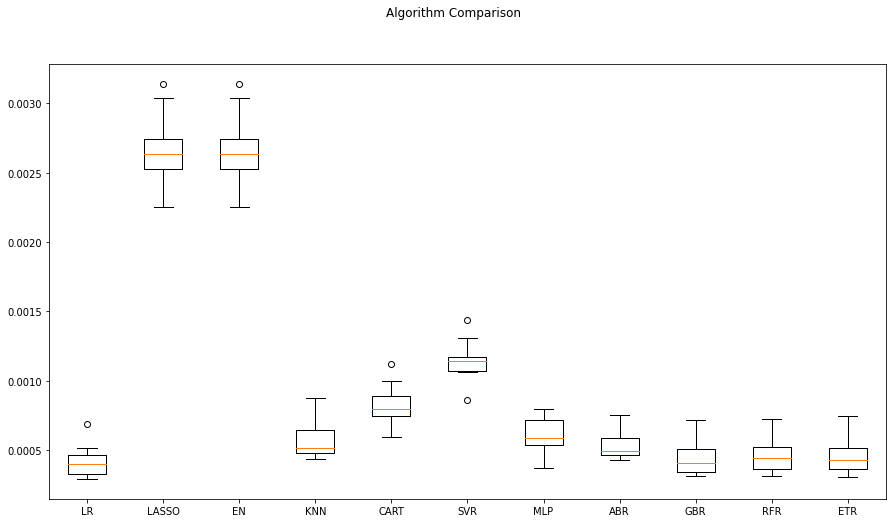

In [38]:
# compare algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
fig.set_size_inches(15,8)
pyplot.show()

* El gráfico muestra el MSE. Cuanto menor sea el MSE, mejor será el rendimiento del modelo.

<a id='4.4'></a>
## 5.4. Time Series based Models- ARIMA and LSTM

<a id='4.4.1'></a>
### 5.4.1 Time Series Model - ARIMA Model

In [39]:
# Preparación de los datos para el modelo ARIMAX, separando las variables endógenas y exógenas

X_train_ARIMA=X_train.drop(['MSFT_pred(t-1)'], axis = 'columns' ).dropna()
X_validation_ARIMA=X_validation.drop(['MSFT_pred(t-1)'], axis = 'columns' ).dropna()
tr_len = len(X_train_ARIMA)
te_len = len(X_validation_ARIMA)
to_len = len (X)

In [40]:
from statsmodels.tsa.arima_model import ARIMA
#from statsmodels.tsa.statespace.sarimax import SARIMAX

from sklearn.metrics import mean_squared_error

modelARIMA=ARIMA(endog=Y_train,exog=X_train_ARIMA,order=[1,0,0])
#modelARIMA= SARIMAX(Y_train,order=(1,1,0),seasonal_order=[1,0,0,0],exog = X_train_ARIMA)

model_fit = modelARIMA.fit()
#print(model_fit.summary())

In [41]:
error_Training_ARIMA = mean_squared_error(Y_train, model_fit.fittedvalues)
predicted = model_fit.predict(start = tr_len -1 ,end = to_len -1, exog = X_validation_ARIMA)[1:]
error_Test_ARIMA = mean_squared_error(Y_validation,predicted)
error_Test_ARIMA

0.005713335964841831

In [42]:
#Add Cross validation if possible
# #model = build_model(_alpha=1.0, _l1_ratio=0.3)
# from sklearn.model_selection import TimeSeriesSplit
# tscv = TimeSeriesSplit(n_splits=5)
# scores = cross_val_score(modelARIMA, X_train, Y_train, cv=tscv, scoring=scoring)

<a id='4.4.2'></a>
### 5.4.2 LSTM Model

Los datos deben estar en formato 3D para el modelo LSTM. Por lo tanto, realizar la transformación de los datos.

In [43]:
X_train_LSTM, X_validation_LSTM = np.array(X_train), np.array(X_validation)
Y_train_LSTM, Y_validation_LSTM = np.array(Y_train), np.array(Y_validation)
X_train_LSTM= X_train_LSTM.reshape((X_train_LSTM.shape[0], 1, X_train_LSTM.shape[1]))
X_validation_LSTM= X_validation_LSTM.reshape((X_validation_LSTM.shape[0], 1, X_validation_LSTM.shape[1]))
print(X_train_LSTM.shape, Y_train_LSTM.shape, X_validation_LSTM.shape, Y_validation_LSTM.shape)

(1864, 1, 12) (1864,) (467, 1, 12) (467,)


In [44]:
# design network
# from matplotlib import pyplot

def create_LSTMmodel(neurons=12, learn_rate = 0.01, momentum=0):
        # create model
    model = Sequential()
    model.add(LSTM(50, input_shape=(X_train_LSTM.shape[1], X_train_LSTM.shape[2])))
    # Se puede añadir más número de celdas si es necesario  
    model.add(Dense(1))
    optimizer = SGD(lr=learn_rate, momentum=momentum)
    model.compile(loss='mse', optimizer='adam')
    return model
LSTMModel = create_LSTMmodel(12, learn_rate = 0.01, momentum=0)
LSTMModel_fit = LSTMModel.fit(X_train_LSTM, Y_train_LSTM, validation_data=(X_validation_LSTM, Y_validation_LSTM),epochs=50, batch_size=72, verbose=0, shuffle=False) # plot history

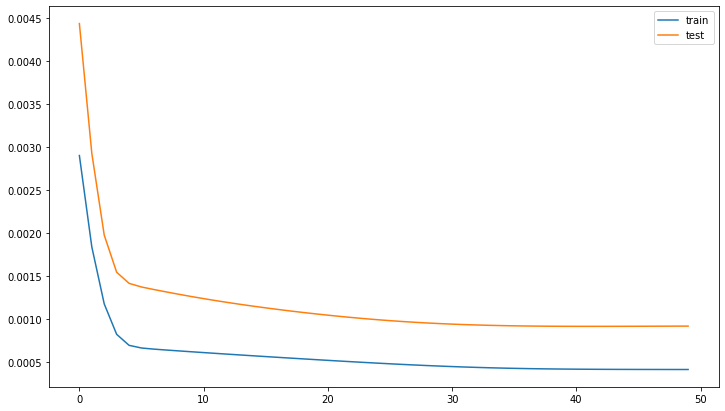

In [45]:
#Visual plot to check if the error is reducing
pyplot.figure(figsize=(12,7))
pyplot.plot(LSTMModel_fit.history['loss'], label='train')
pyplot.plot(LSTMModel_fit.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [46]:
error_Training_LSTM = mean_squared_error(Y_train_LSTM, LSTMModel.predict(X_train_LSTM))
predicted = LSTMModel.predict(X_validation_LSTM)
error_Test_LSTM = mean_squared_error(Y_validation,predicted)
error_Test_LSTM

0.00091930474140307

### Overall Comparison of all the algorithms ( including Time Series Algorithms)

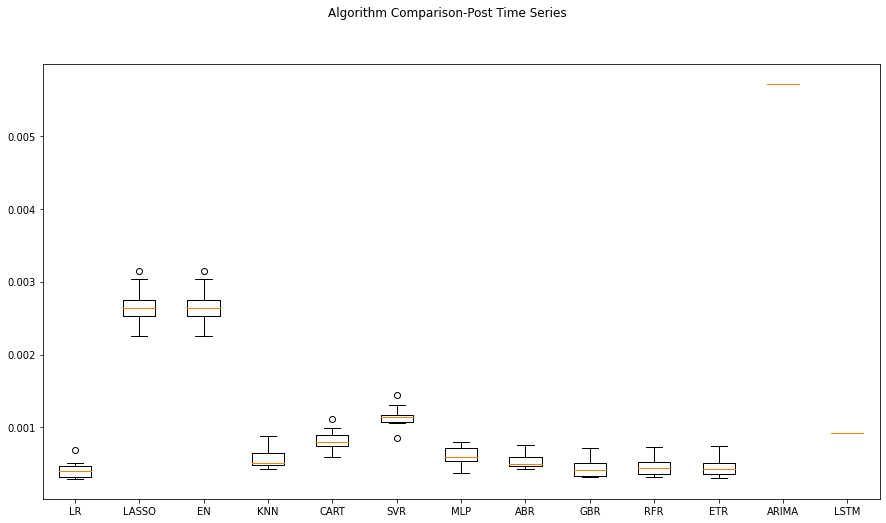

In [47]:
# compare algorithms
results.append(error_Test_ARIMA)
results.append(error_Test_LSTM)
names.append("ARIMA")
names.append("LSTM")
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison-Post Time Series')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
fig.set_size_inches(15,8)
pyplot.show()

* La búsqueda en cuadrícula utiliza la validación cruzada, que no es apropiada para los modelos de series temporales como LSTM

<a id='5'></a>
# 6. Model Tuning and Grid Search

In [49]:
# 1. Grid search : LinearRegression
'''
fit_intercept : booleano, opcional, por defecto True
    si se calcula el intercepto para este modelo. Si se establece
    a False, no se utilizará ningún intercepto en los cálculos
    (por ejemplo, se espera que los datos ya estén centrados).
'''
param_grid = {'fit_intercept': [True, False]}
model = LinearRegression()
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.000419 using {'fit_intercept': True}
-0.000419 (0.000114) with: {'fit_intercept': True}
-0.000419 (0.000115) with: {'fit_intercept': False}


In [51]:
# 2. Grid search : Lasso
'''
alpha : float, opcional
    Constante que multiplica el término L1. Por defecto es 1.0.
    ``alpha = 0`` es equivalente a un mínimo cuadrado ordinario, resuelto
    por el objeto :class:`LinearRegression`. Por razones numéricas
    Por razones numéricas, no se aconseja utilizar ``alpha = 0`` con el objeto ``Lasso``.
    Por ello, se debe utilizar el objeto :class:`LinearRegression`.
''' 
param_grid = {'alpha': [0.01, 0.1, 0.3, 0.7, 1, 1.5, 3, 5]}
model = Lasso()
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.002662 using {'alpha': 0.01}
-0.002662 (0.000258) with: {'alpha': 0.01}
-0.002662 (0.000258) with: {'alpha': 0.1}
-0.002662 (0.000258) with: {'alpha': 0.3}
-0.002662 (0.000258) with: {'alpha': 0.7}
-0.002662 (0.000258) with: {'alpha': 1}
-0.002662 (0.000258) with: {'alpha': 1.5}
-0.002662 (0.000258) with: {'alpha': 3}
-0.002662 (0.000258) with: {'alpha': 5}


In [52]:
# 3. Grid Search : ElasticNet
'''
alpha : float, opcional
    Constante que multiplica los términos de penalización. Por defecto es 1.0.
    Ver las notas para el significado matemático exacto de este parámetro.
    alfa = 0`` es equivalente a un mínimo cuadrado ordinario,
    resuelto por el objeto :class:`LinearRegression`. Por razones numéricas
    Por razones numéricas, no se aconseja utilizar ``alfa = 0`` con el objeto ``Lasso``.
    Por ello, se debe utilizar el objeto :class:`LinearRegression`.

l1_ratio : float
    El parámetro de mezcla de ElasticNet, con ``0 <= l1_ratio <= 1``. Para
    ``l1_ratio = 0`` la penalización es una penalización L2. ``Para l1_ratio = 1`` es
    es una penalización L1.  Para ``0 < l1_ratio < 1``, la penalización es una
    combinación de L1 y L2.
'''
param_grid = {'alpha': [0.01, 0.1, 0.3, 0.7, 1, 1.5, 3, 5],
              'l1_ratio': [0.01, 0.1, 0.3, 0.5, 0.7, 0.9, 0.99]}
model = ElasticNet()
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.000962 using {'alpha': 0.01, 'l1_ratio': 0.01}
-0.000962 (0.000155) with: {'alpha': 0.01, 'l1_ratio': 0.01}
-0.001368 (0.000190) with: {'alpha': 0.01, 'l1_ratio': 0.1}
-0.002662 (0.000258) with: {'alpha': 0.01, 'l1_ratio': 0.3}
-0.002662 (0.000258) with: {'alpha': 0.01, 'l1_ratio': 0.5}
-0.002662 (0.000258) with: {'alpha': 0.01, 'l1_ratio': 0.7}
-0.002662 (0.000258) with: {'alpha': 0.01, 'l1_ratio': 0.9}
-0.002662 (0.000258) with: {'alpha': 0.01, 'l1_ratio': 0.99}
-0.002313 (0.000243) with: {'alpha': 0.1, 'l1_ratio': 0.01}
-0.002662 (0.000258) with: {'alpha': 0.1, 'l1_ratio': 0.1}
-0.002662 (0.000258) with: {'alpha': 0.1, 'l1_ratio': 0.3}
-0.002662 (0.000258) with: {'alpha': 0.1, 'l1_ratio': 0.5}
-0.002662 (0.000258) with: {'alpha': 0.1, 'l1_ratio': 0.7}
-0.002662 (0.000258) with: {'alpha': 0.1, 'l1_ratio': 0.9}
-0.002662 (0.000258) with: {'alpha': 0.1, 'l1_ratio': 0.99}
-0.002662 (0.000258) with: {'alpha': 0.3, 'l1_ratio': 0.01}
-0.002662 (0.000258) with: {'alpha': 0.3, 'l1_r

In [54]:
# 4. Grid search : KNeighborsRegressor 
'''
n_neighbors : int, opcional (por defecto = 5)
    Número de vecinos a utilizar por defecto para las consultas :meth:`kneighbors`.
'''
param_grid = {'n_neighbors': [1,3,5,7,9,11,13,15,17,19,21]}
model = KNeighborsRegressor()
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle= True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.000559 using {'n_neighbors': 7}
-0.000847 (0.000183) with: {'n_neighbors': 1}
-0.000609 (0.000149) with: {'n_neighbors': 3}
-0.000572 (0.000127) with: {'n_neighbors': 5}
-0.000559 (0.000129) with: {'n_neighbors': 7}
-0.000572 (0.000134) with: {'n_neighbors': 9}
-0.000585 (0.000135) with: {'n_neighbors': 11}
-0.000590 (0.000131) with: {'n_neighbors': 13}
-0.000601 (0.000131) with: {'n_neighbors': 15}
-0.000616 (0.000130) with: {'n_neighbors': 17}
-0.000630 (0.000129) with: {'n_neighbors': 19}
-0.000640 (0.000133) with: {'n_neighbors': 21}


In [56]:
# 5. Grid search : DecisionTreeRegressor 
'''
min_samples_split : int, float, opcional (por defecto=2)
    El número mínimo de muestras necesarias para dividir un nodo interno:
    - Si es int, entonces considera `min_samples_split` como el número mínimo.
    - Si es float, `min_samples_split` es un porcentaje y
      `ceil(min_samples_split * n_samples)` son el número mínimo de
      número de muestras para cada división.
'''
param_grid={'min_samples_split': [2,3,4,5,6,7,8,9,10]}
model = DecisionTreeRegressor()
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.000755 using {'min_samples_split': 10}
-0.000846 (0.000108) with: {'min_samples_split': 2}
-0.000845 (0.000131) with: {'min_samples_split': 3}
-0.000825 (0.000127) with: {'min_samples_split': 4}
-0.000791 (0.000127) with: {'min_samples_split': 5}
-0.000797 (0.000108) with: {'min_samples_split': 6}
-0.000797 (0.000132) with: {'min_samples_split': 7}
-0.000792 (0.000128) with: {'min_samples_split': 8}
-0.000756 (0.000117) with: {'min_samples_split': 9}
-0.000755 (0.000122) with: {'min_samples_split': 10}


In [58]:
# 6. Grid search : SVR 
'''
C : float, opcional (por defecto=1.0)
    Parámetro de penalización C del término de error.

epsilon : float, opcional (por defecto=0.1)
     Epsilon en el modelo epsilon-SVR. Especifica el tubo de épsilon
     dentro del cual no se asocia ninguna penalización en la función de pérdida de entrenamiento
     con los puntos predichos dentro de una distancia epsilon del valor real
     valor real.
gamma : float, opcional (por defecto='auto')
    Coeficiente del núcleo para 'rbf', 'poly' y 'sigmoid'.
    Si gamma es 'auto', entonces se utilizará 1/n_features en su lugar.
'''
param_grid={'C': [0.01, 0.03,0.1,0.3,1,3,10,30,100],
            'gamma': [0.001, 0.01, 0.1, 1]},
            #'epslion': [0.01, 0.1, 1]}
model = SVR()
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.000810 using {'C': 100, 'gamma': 0.01}
-0.002656 (0.000256) with: {'C': 0.01, 'gamma': 0.001}
-0.002591 (0.000252) with: {'C': 0.01, 'gamma': 0.01}
-0.002196 (0.000231) with: {'C': 0.01, 'gamma': 0.1}
-0.001543 (0.000197) with: {'C': 0.01, 'gamma': 1}
-0.002641 (0.000255) with: {'C': 0.03, 'gamma': 0.001}
-0.002466 (0.000245) with: {'C': 0.03, 'gamma': 0.01}
-0.001824 (0.000206) with: {'C': 0.03, 'gamma': 0.1}
-0.001321 (0.000188) with: {'C': 0.03, 'gamma': 1}
-0.002591 (0.000252) with: {'C': 0.1, 'gamma': 0.001}
-0.002186 (0.000232) with: {'C': 0.1, 'gamma': 0.01}
-0.001514 (0.000192) with: {'C': 0.1, 'gamma': 0.1}
-0.001040 (0.000166) with: {'C': 0.1, 'gamma': 1}
-0.002465 (0.000245) with: {'C': 0.3, 'gamma': 0.001}
-0.001820 (0.000210) with: {'C': 0.3, 'gamma': 0.01}
-0.001290 (0.000183) with: {'C': 0.3, 'gamma': 0.1}
-0.001044 (0.000132) with: {'C': 0.3, 'gamma': 1}
-0.002186 (0.000231) with: {'C': 1, 'gamma': 0.001}
-0.001504 (0.000193) with: {'C': 1, 'gamma': 0.01}
-0.00

In [60]:
# 7. Grid search : MLPRegressor 
'''
hidden_layer_sizes : tupla, longitud = n_capas - 2, por defecto (100,)
    El ith elemento representa el número de neuronas en el ith
    capa oculta.
'''
param_grid={'hidden_layer_sizes': [(20,), (50,), (20,20), (20, 30, 20)]}
model = MLPRegressor()
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.000744 using {'hidden_layer_sizes': (50,)}
-0.001243 (0.000354) with: {'hidden_layer_sizes': (20,)}
-0.000744 (0.000118) with: {'hidden_layer_sizes': (50,)}
-0.001023 (0.000218) with: {'hidden_layer_sizes': (20, 20)}
-0.000747 (0.000145) with: {'hidden_layer_sizes': (20, 30, 20)}


In [61]:
# 8. Grid search : RandomForestRegressor 
'''
n_estimators : entero, opcional (por defecto=10)
    El número de árboles en el bosque.
'''
param_grid = {'n_estimators': [50,100,150,200,250,300,350,400]}
model = RandomForestRegressor()
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle= True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.000454 using {'n_estimators': 300}
-0.000461 (0.000114) with: {'n_estimators': 50}
-0.000461 (0.000113) with: {'n_estimators': 100}
-0.000462 (0.000115) with: {'n_estimators': 150}
-0.000458 (0.000115) with: {'n_estimators': 200}
-0.000458 (0.000113) with: {'n_estimators': 250}
-0.000454 (0.000115) with: {'n_estimators': 300}
-0.000457 (0.000113) with: {'n_estimators': 350}
-0.000457 (0.000114) with: {'n_estimators': 400}


In [63]:
# 9. Grid search : GradientBoostingRegressor 
'''
n_estimators:
    El número de etapas de refuerzo a realizar. El refuerzo de gradiente
    es bastante resistente al sobreajuste, por lo que un número elevado suele
    resultados en un mejor rendimiento.
''' 
param_grid = {'n_estimators': [50,100,150,200,250,300,350,400]}
model = GradientBoostingRegressor(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.000440 using {'n_estimators': 50}
-0.000440 (0.000119) with: {'n_estimators': 50}
-0.000447 (0.000122) with: {'n_estimators': 100}
-0.000454 (0.000126) with: {'n_estimators': 150}
-0.000461 (0.000129) with: {'n_estimators': 200}
-0.000468 (0.000129) with: {'n_estimators': 250}
-0.000475 (0.000130) with: {'n_estimators': 300}
-0.000479 (0.000131) with: {'n_estimators': 350}
-0.000485 (0.000134) with: {'n_estimators': 400}


In [64]:
# 10. Grid search : ExtraTreesRegressor 
'''
n_estimators : entero, opcional (por defecto=10)
    El número de árboles en el bosque.
''' 
param_grid = {'n_estimators': [50,100,150,200,250,300,350,400]}
model = ExtraTreesRegressor(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.000454 using {'n_estimators': 300}
-0.000465 (0.000121) with: {'n_estimators': 50}
-0.000460 (0.000121) with: {'n_estimators': 100}
-0.000457 (0.000122) with: {'n_estimators': 150}
-0.000455 (0.000122) with: {'n_estimators': 200}
-0.000455 (0.000121) with: {'n_estimators': 250}
-0.000454 (0.000121) with: {'n_estimators': 300}
-0.000455 (0.000121) with: {'n_estimators': 350}
-0.000455 (0.000120) with: {'n_estimators': 400}


In [65]:
# 11. Grid search : AdaBoostRegre
'''
n_estimators : entero, opcional (por defecto=50)
    El número máximo de estimadores en el que se termina el boosting.
    En caso de ajuste perfecto, el procedimiento de aprendizaje se detiene antes.

learning_rate : float, opcional (por defecto=1.)
    La tasa de aprendizaje reduce la contribución de cada regresor en
    ``tasa de aprendizaje``. Hay un equilibrio entre ``tasa de aprendizaje`` y
    ``n_estimadores``.
''' 
param_grid = {'n_estimators': [50,100,150,200,250,300,350,400],
             'learning_rate': [1, 2, 3]}
model = AdaBoostRegressor(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.000531 using {'learning_rate': 1, 'n_estimators': 50}
-0.000531 (0.000099) with: {'learning_rate': 1, 'n_estimators': 50}
-0.000561 (0.000097) with: {'learning_rate': 1, 'n_estimators': 100}
-0.000571 (0.000098) with: {'learning_rate': 1, 'n_estimators': 150}
-0.000573 (0.000097) with: {'learning_rate': 1, 'n_estimators': 200}
-0.000578 (0.000097) with: {'learning_rate': 1, 'n_estimators': 250}
-0.000581 (0.000096) with: {'learning_rate': 1, 'n_estimators': 300}
-0.000580 (0.000094) with: {'learning_rate': 1, 'n_estimators': 350}
-0.000581 (0.000096) with: {'learning_rate': 1, 'n_estimators': 400}
-0.000573 (0.000084) with: {'learning_rate': 2, 'n_estimators': 50}
-0.000580 (0.000095) with: {'learning_rate': 2, 'n_estimators': 100}
-0.000582 (0.000092) with: {'learning_rate': 2, 'n_estimators': 150}
-0.000581 (0.000093) with: {'learning_rate': 2, 'n_estimators': 200}
-0.000584 (0.000090) with: {'learning_rate': 2, 'n_estimators': 250}
-0.000589 (0.000089) with: {'learning_rate

In [66]:
# 12. Grid search : KerasNNRegressor 
'''
nn_shape : tupla, longitud = n_capas - 2, por defecto (100,)
    El ith elemento representa el número de neuronas en el ith
    capa oculta.
''' 
#Add Deep Learning Regressor
if ( EnableDeepLearningRegreesorFlag == 1):
    param_grid={'nn_shape': [(20,), (50,), (20,20), (20, 30, 20)]}
    model = KerasRegressor()
    kfold = KFold(n_splits=num_folds, random_state=seed)
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
    grid_result = grid.fit(X_train, Y_train)
    print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
    means = grid_result.cv_results_['mean_test_score']
    stds = grid_result.cv_results_['std_test_score']
    params = grid_result.cv_results_['params']
    for mean, stdev, param in zip(means, stds, params):
        print("%f (%f) with: %r" % (mean, stdev, param))

<a id='5.2'></a>
### 6.2. Grid Search- Time Series Models

In [67]:
# Búsqueda de cuadrícula para el modelo ARIMA
# Cambia p,d y q y comprueba el mejor resultado

# evaluar un modelo ARIMA para un orden determinado (p,d,q)
# Suponiendo que los datos de entrenamiento y de prueba ya están definidos antes

def evaluate_arima_model(arima_order):
    # predicted = list()     
    modelARIMA=ARIMA(endog=Y_train,exog=X_train_ARIMA,order=arima_order)
    model_fit = modelARIMA.fit()   
    # error en el conjunto de pruebas
#     tr_len = len(X_train_ARIMA)
#     to_len = len(X_train_ARIMA) + len(X_validation_ARIMA)
#     predicted = model_fit.predict(start = tr_len -1 ,end = to_len -1, exog = X_validation_ARIMA)[1:]
#     error = mean_squared_error(predicted, Y_validation)
    # error en el conjunto de entrenamiento 
    error = mean_squared_error(Y_train, model_fit.fittedvalues)
    return error
 
# evaluar combinaciones de valores p, d y q para un modelo ARIMA
def evaluate_models(p_values, d_values, q_values): 
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)                
                try:
                    mse = evaluate_arima_model(order)                    
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    print('ARIMA%s MSE=%.7f' % (order,mse))
                except:
                    continue
    print('Best ARIMA%s MSE=%.7f' % (best_cfg, best_score))
    
# evaluar los parámetros
p_values = [0, 1, 2]
d_values = range(0, 2)
q_values = range(0, 2)
warnings.filterwarnings("ignore")
evaluate_models(p_values, d_values, q_values)    

ARIMA(0, 0, 0) MSE=0.0007401
ARIMA(0, 0, 1) MSE=0.0006150
ARIMA(1, 0, 0) MSE=0.0004124
ARIMA(1, 0, 1) MSE=0.0004124
ARIMA(2, 0, 0) MSE=0.0004124
ARIMA(2, 0, 1) MSE=0.0004107
Best ARIMA(2, 0, 1) MSE=0.0004107


In [68]:
# Búsqueda en cuadrícula para el modelo LSTM

# evaluar un modelo LSTM para un orden determinado (p,d,q)
def evaluate_LSTM_model(neurons=12, learn_rate = 0.01, momentum=0):
    #predicted = list()     
    LSTMModel = create_LSTMmodel(neurons, learn_rate, momentum)
    LSTMModel_fit = LSTMModel.fit(X_train_LSTM, Y_train_LSTM,epochs=50, batch_size=72, verbose=0, shuffle=False)
    predicted = LSTMModel.predict(X_validation_LSTM)
    error = mean_squared_error(predicted, Y_validation)
    return error

# evaluar combinaciones de diferentes variables del modelo LSTM
def evaluate_combinations_LSTM(neurons, learn_rate, momentum): 
    best_score, best_cfg = float("inf"), None
    for n in neurons:
        for l in learn_rate:
            for m in momentum:
                combination = (n,l,m)                
                try:
                    mse = evaluate_LSTM_model(n,l,m)                    
                    if mse < best_score:
                        best_score, best_cfg = mse, combination
                    print('LSTM%s MSE=%.7f' % (combination,mse))
                except:
                    continue
    print('Best LSTM%s MSE=%.7f' % (best_cfg, best_score))
    
# evaluar los parámetros
neurons = [1, 5]
learn_rate = [0.001, 0.3]
momentum = [0.0, 0.9]
# También se pueden modificar otros parámetros
batch_size = [10, 20, 40, 60, 80, 100]
epochs = [10, 50, 100]
warnings.filterwarnings("ignore")
evaluate_combinations_LSTM(neurons,learn_rate,momentum) 

LSTM(1, 0.001, 0.0) MSE=0.0009347
LSTM(1, 0.001, 0.9) MSE=0.0009303
LSTM(1, 0.3, 0.0) MSE=0.0009346
LSTM(1, 0.3, 0.9) MSE=0.0009297
LSTM(5, 0.001, 0.0) MSE=0.0009175
LSTM(5, 0.001, 0.9) MSE=0.0009259
LSTM(5, 0.3, 0.0) MSE=0.0009255
LSTM(5, 0.3, 0.9) MSE=0.0009152
Best LSTM(5, 0.3, 0.9) MSE=0.0009152


<a id='6'></a>
# 7. Finalise the Model

Seleccionemos uno de los modelos para finalizar los datos. Mirando los resultados para el modelo Random Forest. Mirando los resultados para el modelo RandomForestRegressor.

<a id='6.1'></a>
## 7.1. Results on the Test Dataset

In [69]:
# preparar el modelo
# scaler = StandardScaler().fit(X_train)
# rescaledX = scaler.transform(X_train)
model = RandomForestRegressor(n_estimators=250) # rbf is default kernel
model.fit(X_train, Y_train)

RandomForestRegressor(n_estimators=250)

In [70]:
# estimar la precisión en el conjunto de validación
# transformar el conjunto de datos de validación
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
# rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(X_validation)
print(mean_squared_error(Y_validation, predictions))
print(r2_score(Y_validation, predictions))

0.001250969636303437
0.7647693549418592


In [71]:
predictions

array([ 5.51552916e-02,  5.39700110e-02,  4.62800672e-02,  4.94193069e-02,
        5.65128567e-02,  6.98405129e-02,  5.63034408e-02,  5.14544417e-02,
        6.51516040e-02,  7.67218273e-02,  7.28190207e-02,  6.01693938e-02,
        5.41940829e-02,  5.05431242e-02,  3.02871741e-02,  4.37902942e-02,
        7.78665575e-02,  7.52143288e-02,  7.38445697e-02,  1.22569544e-01,
        1.21288219e-01,  1.51231271e-01,  1.41089770e-01,  1.45432528e-01,
        1.37452713e-01,  1.20723991e-01,  1.21398028e-01,  1.26418883e-01,
        1.14012702e-01,  1.13458089e-01,  9.93532401e-02,  7.15609566e-02,
        3.15307484e-02,  4.88671565e-02, -3.42856333e-02, -3.04511740e-02,
       -1.71564107e-02, -1.28408311e-02, -7.99303084e-02, -9.12214400e-02,
       -1.08809362e-01, -1.03903963e-01, -1.11160728e-01, -6.78388947e-02,
       -1.11015192e-01, -6.82857378e-02, -1.06593327e-01, -6.63481199e-02,
       -6.62501351e-02, -6.58371404e-02, -1.02158408e-01, -1.05500620e-01,
       -6.97021319e-02, -

<a id='6.2'></a>
## 7.2. Variable Intuition/Feature Importance
Veamos la importancia de las características del modelo Random Forest.

[0.86652147 0.01432989 0.01051288 0.01317903 0.01206708 0.00972001
 0.01070889 0.01274025 0.0115539  0.0140154  0.01316951 0.0114817 ]


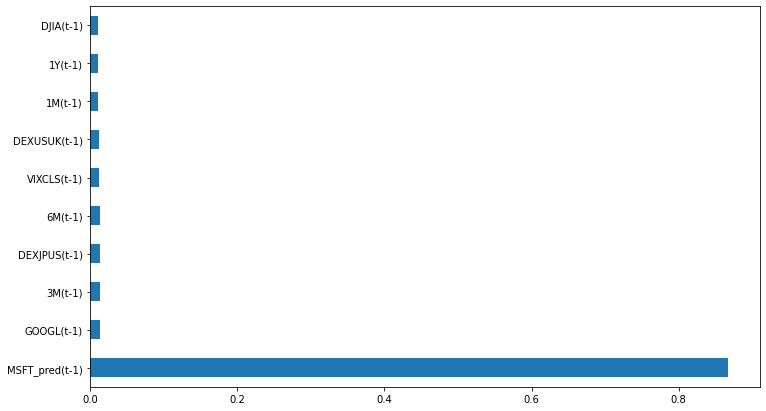

In [73]:
import pandas as pd
import numpy as np
model = RandomForestRegressor()
model.fit(X_train,Y_train)
print(model.feature_importances_) # utilizar la clase incorporada feature_importances de los regresores basados en el árbol
# trazar un gráfico de la importancia de las características para una mejor visualización
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
pyplot.figure(figsize=(12,7))
feat_importances.nlargest(10).plot(kind='barh')
pyplot.show()

<a id='6.3'></a>
## 7.3. Save Model for Later Use

In [74]:
# Guardar el modelo usando Pickle
from pickle import dump
from pickle import load

# guardar el modelo en el disco
filename = 'finalized_model.sav'
dump(model, open(filename, 'wb'))

In [75]:
# algún tiempo después...
# cargar el modelo desde el disco
loaded_model = load(open(filename, 'rb'))
# estimar la precisión en el conjunto de validación
# rescaledValidationX = scaler.transform(X_validation) # en caso de que los datos sean escalados.
# predictions = model.predict(rescaledValidationX)
predictions = model.predict(X_validation)
result = mean_squared_error(Y_validation, predictions)
print(result)

0.001235796333486347
